In [1]:
import psycopg2
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/tmp/ipykernel_1516/4081314138.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Connect to Postgresql
# Connect to Postgresql
params = configparser.ConfigParser()
params.read("database.ini")
conn = psycopg2.connect(
    database=params['postgresql']['database'],
    host=params['postgresql']['host'],
    user=params['postgresql']['user'],
    password=params['postgresql']['password'],
    port=params['postgresql']['port']
)

In [3]:
# Get data from table responders
sql = "SELECT * FROM responders"
df = pd.read_sql_query(sql, conn)

/tmp/ipykernel_1516/1100211736.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


In [4]:
# Check data
df

,responder_id,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
0,1,25.0,Female,50000.0,Bachelor's Degree,Single,0.0,Rented,High
1,2,30.0,Male,100000.0,Master's Degree,Married,2.0,Owned,High
2,3,35.0,Female,75000.0,Doctorate,Married,1.0,Owned,High
3,4,40.0,Male,125000.0,High School Diploma,Single,0.0,Owned,High
4,5,45.0,Female,100000.0,Bachelor's Degree,Married,3.0,Owned,High
...,...,...,...,...,...,...,...,...,...
159,160,29.0,Female,27500.0,High School Diploma,Single,0.0,Rented,Low
160,161,34.0,Male,47500.0,Associate's Degree,Single,0.0,Rented,Average
161,162,39.0,Female,62500.0,Bachelor's Degree,Married,2.0,Owned,High
162,163,44.0,Male,87500.0,Master's Degree,Single,0.0,Owned,High


In [5]:
# Get Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   responder_id        164 non-null    int64  
 1   age                 164 non-null    float64
 2   gender              164 non-null    object 
 3   income              164 non-null    float64
 4   education           164 non-null    object 
 5   marital_status      164 non-null    object 
 6   number_of_children  164 non-null    float64
 7   home_ownership      164 non-null    object 
 8   credit_score        164 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 11.7+ KB


<Axes: xlabel='credit_score'>

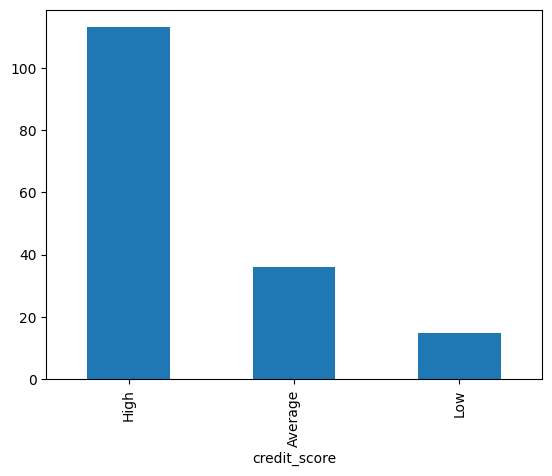

In [6]:
# Type credit score
df['credit_score'].unique()
# Gender responder
df['credit_score'].value_counts().plot(kind='bar')

In [7]:
#Check Null Value
df.isnull().sum()

responder_id          0
age                   0
gender                0
income                0
education             0
marital_status        0
number_of_children    0
home_ownership        0
credit_score          0
dtype: int64

<Axes: xlabel='gender'>

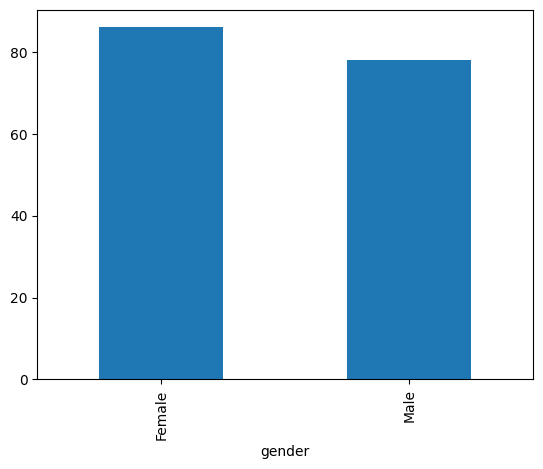

In [8]:
# Gender responder
df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='marital_status'>

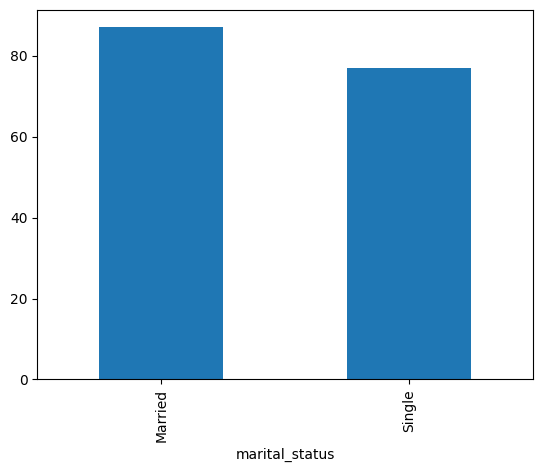

In [9]:
# Marital status responder
df['marital_status'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

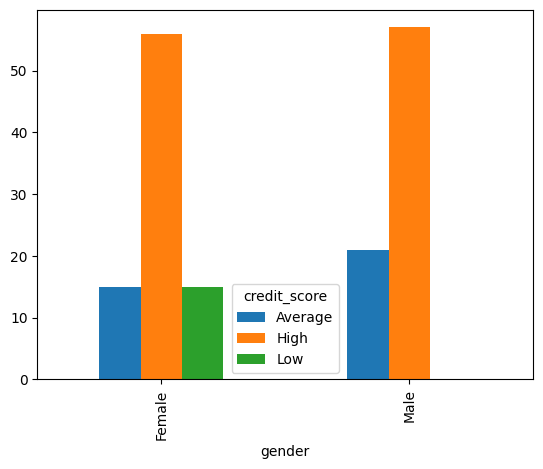

In [10]:
df.groupby(['gender'])['credit_score'].value_counts().unstack().plot(kind ='bar')

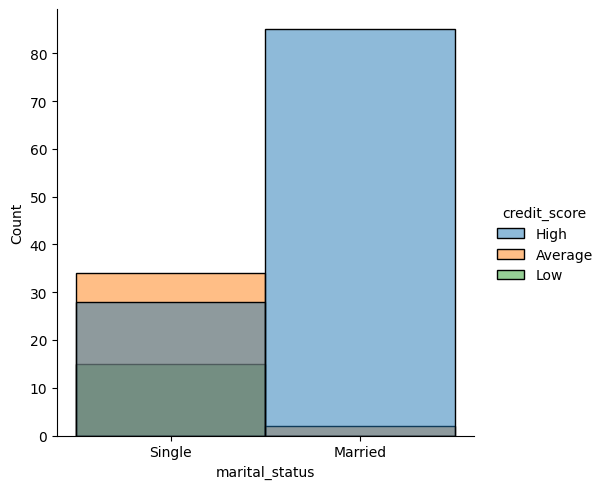

In [11]:
sns.displot(df, x="marital_status", hue="credit_score")

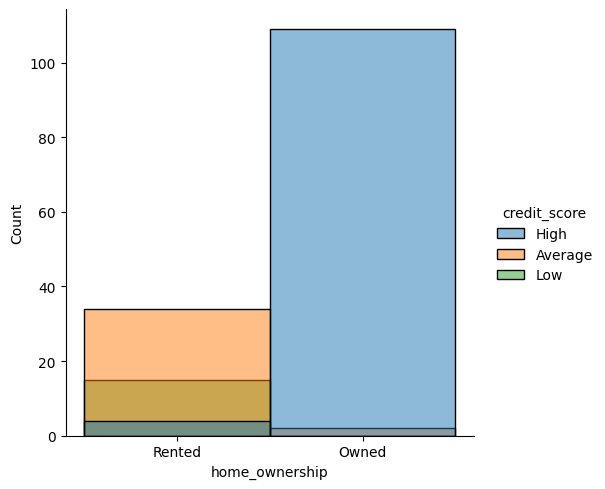

In [12]:
sns.displot(df, x="home_ownership", hue="credit_score")

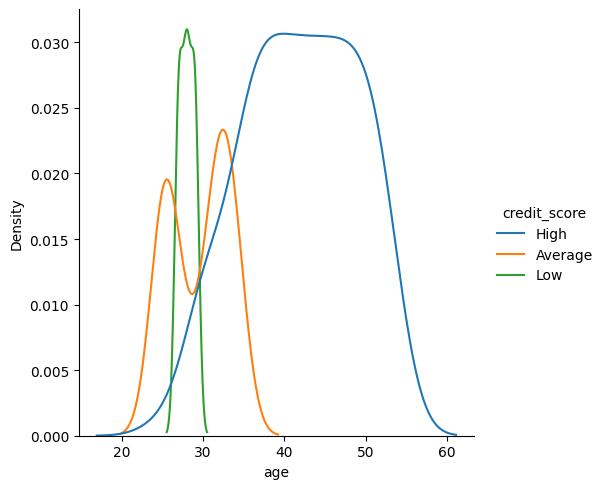

In [13]:
sns.displot(df, x="age", hue="credit_score", kind='kde')

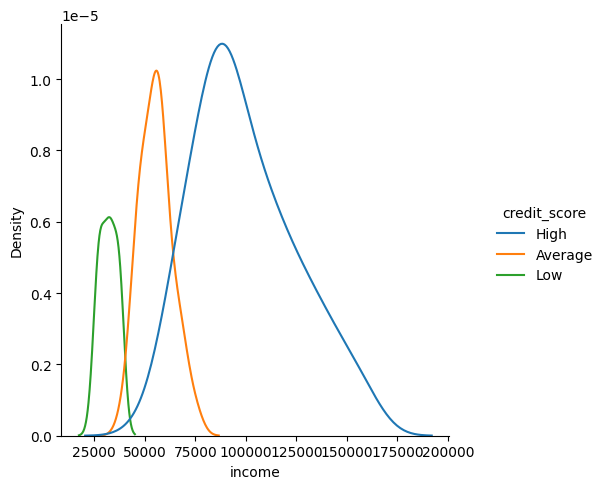

In [14]:
sns.displot(df, x="income", hue="credit_score", kind='kde')

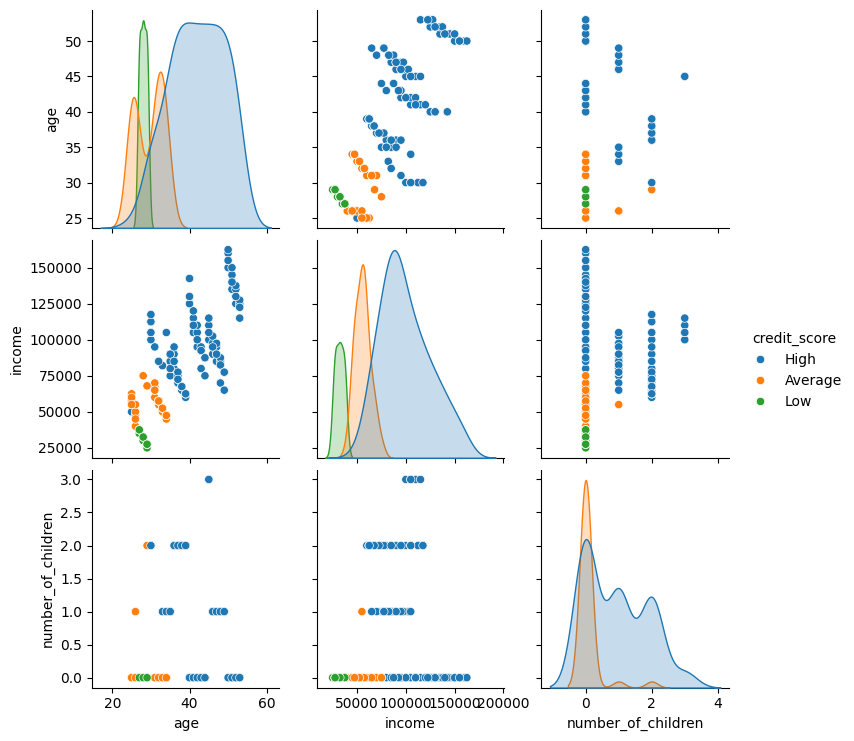

In [15]:
sns.pairplot(data=df.iloc[:,1:], hue='credit_score')